### 1. Import and install libraries

In [10]:
import json
import pandas as pd  # to load the dataframe
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets  # to retrieve the iris Dataset
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

### 2. Load datasets

In [15]:
df = pd.read_csv('/content/final_table.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Classification as urban/semi-urban/rural_one-hot,log_Population,water_source_category_one-hot,log_angle,#status_id_one-hot,log_days_passed,#adm2_one-hot,log_dist,#pay_one-hot,water_tech_category_one-hot,Water demand (lpcd)_one-hot
0,0,19.343908,0,9.966469,0,11.388017,0,9.976453,0,0,0
1,1,17.471318,1,9.966516,0,11.381002,1,9.976761,0,0,1
2,2,16.842817,0,9.966564,1,11.375583,2,9.976714,0,0,2
3,1,17.471318,0,9.966564,0,11.382084,1,9.976842,0,0,1
4,1,17.471318,0,9.966564,0,11.379920,1,9.976903,0,0,1


In [16]:
# Opening JSON file
with open('one_hot_cols.json') as json_file:
    one_hot_data = json.load(json_file)

### 3. Visualize and compare correlation maps of top 10 feature set original and PCA components

In [29]:
dfx = df.drop(["Water demand (lpcd)_one-hot"], axis = 1)
dfy = df["Water demand (lpcd)_one-hot"]

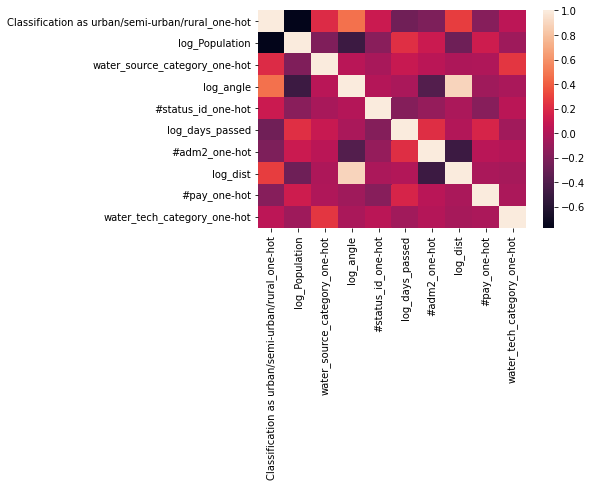

In [30]:
sns.heatmap(dfx.corr())
#We can observe from the above heatmap that classifcation col has high correlation with water demand
# Thus, we evidently need to apply dimensionality reduction. 

In [53]:
#apply pca
pca = PCA(n_components = 3)
pca.fit(dfx)
data_pca = pca.transform(dfx)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-5.500657,-1.218441,-0.129542
1,-4.581768,0.983594,-0.122478
2,-3.645836,2.078877,-0.298276
3,-4.584193,0.926158,-0.263834
4,-4.584193,0.926160,-0.263833


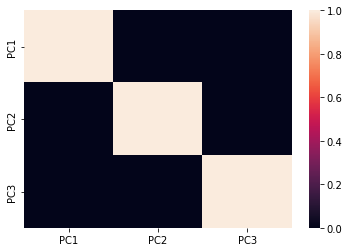

In [54]:
sns.heatmap(data_pca.corr())
#The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, PC3, PC4 and PC5). 
# Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space
# while ensuring that there is no correlation between the so obtained PCs is minimum.


In [55]:
# 1. For efficient working of ML models, our feature set needs to have features with no co-relation. After implementing the PCA on our dataset, 
#all the Principal Components are independent – there is no correlation among them.
# 2. A Large number of feature sets lead to the issue of overfitting in models. PCA reduces the dimensions of the feature set – thereby reducing the chances of overfitting.
# 3. PCA helps us reduce the dimensions of our feature set; thus,
# the newly formed dataset comprising Principal Components need less disk/cloud space for storage while retaining maximum information.

##$ 4. Visualize and compare scatter plots original features and PCA components and apply K-means

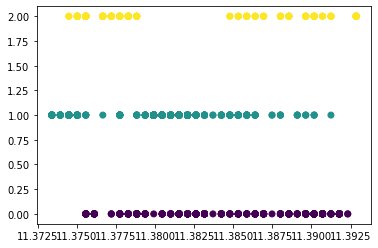

In [81]:
plt.scatter(dfx['log_days_passed'], dfx['Classification as urban/semi-urban/rural_one-hot'], c=dfy)
plt.show()

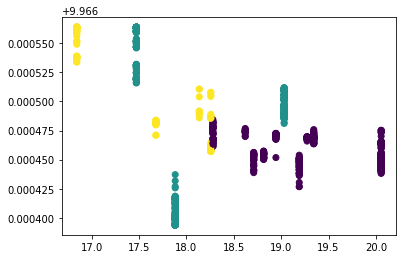

In [80]:
plt.scatter(dfx['log_Population'], dfx['log_angle'], c=dfy)
plt.show()

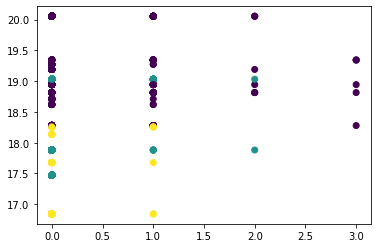

In [91]:
plt.scatter(dfx['#pay_one-hot'], dfx['log_Population'], c=dfy)
plt.show()

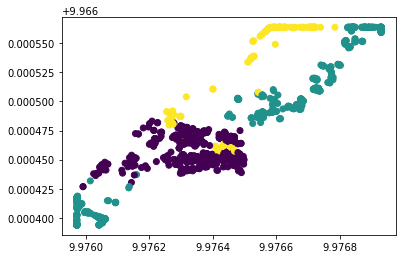

In [89]:
plt.scatter(dfx['log_dist'], dfx['log_angle'], c=dfy)
plt.show()

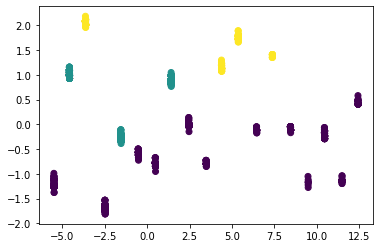

In [70]:
plt.scatter(data_pca['PC1'], data_pca['PC2'], c=dfy)
plt.show()

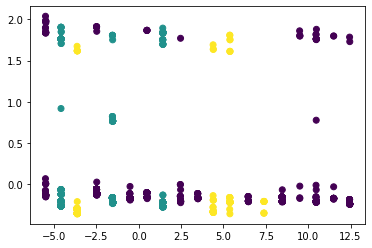

In [71]:
plt.scatter(data_pca['PC1'], data_pca['PC3'], c=dfy)
plt.show()

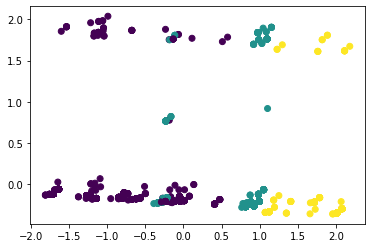

In [72]:
plt.scatter(data_pca['PC2'], data_pca['PC3'], c=dfy)
plt.show()

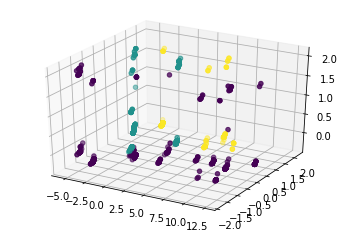

In [76]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c=dfy)
plt.show()

In [57]:
# Instantiate Kmeans
km = KMeans(3)
clusts = km.fit_predict(data_pca)

In [58]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

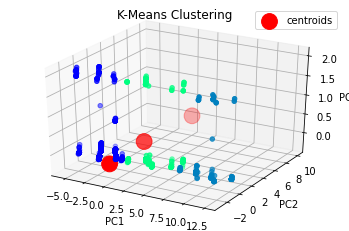

In [60]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(km.cluster_centers_[:, 2],
            km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(data_pca['PC1'],data_pca['PC2'],data_pca['PC3'],
                     c=clusts,s=20, cmap='winter')
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()